In [1]:
import numpy as np
import pandas as pd
from activation import *
from loss import *
from gradient import *

from layers import *

In [2]:
from sklearn.datasets import load_wine

In [222]:
def make_one(x):
    if x.ndim == 2:
        x = np.ravel(x.values)
    t = np.zeros((x.size,np.unique(x).size))
    for i in range(t.shape[0]):
        t[i,x[i]] = 1
    return t

In [223]:
X = load_wine().data
y = load_wine().target
t = np.zeros((y.size,np.unique(y).size))
for i in range(t.shape[0]):
    t[i,y[i]] = 1

In [224]:
X.shape, y.shape, t.shape

((178, 13), (178,), (178, 3))

In [244]:
def prob(x):
    return x/np.sum(x)

In [246]:
x = np.array([[3,4,7]])
softmax(x)

array([[0.01714783, 0.04661262, 0.93623955]])

In [248]:
prob(x)

array([[0.21428571, 0.28571429, 0.5       ]])

In [249]:
np.sum(softmax(x))

1.0

In [247]:
np.sum(prob(x))

1.0

In [389]:
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.layer = {}
        self.layer['Input'] = np.random.randn(input_size,hidden_size[0])
        self.layer['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(1,len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.layer[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.layer[b] = np.random.randn(hidden_size[i+1])
        
    def predict(self,x):
        j = 0
        for i in range(len(self.layer)):
            if j % 2 == 0 and i >= (len(self.layer)-2):
                x = relu(np.dot(x,self.layer[list(self.layer.keys())[i]]) + self.layer[list(self.layer.keys())[i+1]])
            elif j % 2 == 0 and i < (len(self.layer)-2):
                x = (np.dot(x,self.layer[list(self.layer.keys())[i]]) + self.layer[list(self.layer.keys())[i+1]])
            j+=1
        return softmax(x)

    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        f = lambda W : self.loss(x,t)
        grads = {}
        for key in self.layer.keys():
            grads[key] = numerical_gradient(f,self.layer[key])
        return grads
    
    def accuracy(self,x,t):
        y = np.argmax(self.predict(x),axis=1)
        t = np.argmax(t,axis=1)
        acc = np.sum(y == t)/y.size
        return acc
    
    def fit(self,x,t,epochs=1000,lr=1e-3,verbos=1):
        grads = self.numerical_gradient(x,t)
        for epoch in range(epochs):
            for key in self.layer.keys():
                self.layer[key] -= lr*grads[key]
            if verbos == 1:
                print(f'epoch:{epoch}, accuracy:{self.accuracy(x,t)}, loss:{self.loss(x,t)}')

In [371]:
model = MultiLayerNet(3,[3,3,4,5,6],10)

In [359]:
x = np.random.randn(10,3)

In [360]:
y = np.random.randint(10,size=100)
t = make_one(y)

In [361]:
t = t[:10,:]

In [362]:
t.shape

(10, 10)

In [363]:
model.numerical_gradient(x,t)

{'Input': array([[ 0.0663207 , -0.07998413, -0.0600715 ],
        [ 0.08463952, -0.10390225, -0.05634127],
        [-0.3042545 ,  0.38199584,  0.06936023]]),
 'Input_b': array([ 2.60885828e-09, -3.35661338e-09,  3.91422274e-10]),
 'W1': array([[ 0.32959341,  0.36508659,  0.39872149, -0.90308361],
        [-0.18560275, -0.27057873, -0.2081622 ,  0.53785351],
        [-0.63989262, -0.6698321 , -0.78468955,  1.74036764]]),
 'b1': array([-3.71897563e-09, -2.92912312e-09, -4.81431747e-09,  9.74279285e-09]),
 'W2': array([[-1.42278783, -1.4601901 , -1.96107523,  0.29028048,  2.0376034 ],
        [-0.88468047, -0.88571112, -1.28855305,  0.20818764,  1.28327823],
        [ 0.38220467,  0.38509615,  0.54902643, -0.08685496, -0.55267845],
        [-1.49935333, -1.67863712, -1.62211801,  0.12707179,  2.04193289]]),
 'b2': array([-3.73468734e-09, -4.32774245e-09, -3.57791492e-09,  1.30614305e-10,
         4.97720674e-09]),
 'W3': array([[ 0.42817449, -0.52835613, -0.39786041,  0.93845754, -0.79912

In [400]:
model.fit(x,t,epochs=1000,lr=1e-3)

epoch:0, accuracy:0.1, loss:14.506286075862487
epoch:1, accuracy:0.1, loss:14.506286075862487
epoch:2, accuracy:0.1, loss:14.506286075862487
epoch:3, accuracy:0.1, loss:14.506286075862487
epoch:4, accuracy:0.1, loss:14.506286075862487
epoch:5, accuracy:0.1, loss:14.506286075862487
epoch:6, accuracy:0.1, loss:14.506286075862487
epoch:7, accuracy:0.1, loss:14.506286075862487
epoch:8, accuracy:0.1, loss:14.506286075862487
epoch:9, accuracy:0.1, loss:14.506286075862487
epoch:10, accuracy:0.1, loss:14.506286075862487
epoch:11, accuracy:0.1, loss:14.506286075862487
epoch:12, accuracy:0.1, loss:14.506286075862487
epoch:13, accuracy:0.1, loss:14.506286075862487
epoch:14, accuracy:0.1, loss:14.506286075862487
epoch:15, accuracy:0.1, loss:14.506286075862487
epoch:16, accuracy:0.1, loss:14.506286075862487
epoch:17, accuracy:0.1, loss:14.506286075862487
epoch:18, accuracy:0.1, loss:14.506286075862487
epoch:19, accuracy:0.1, loss:14.506286075862487
epoch:20, accuracy:0.1, loss:14.506286075862487
ep

In [401]:
model.accuracy(x,t)

0.1

In [339]:
X = load_digits().data
y = load_digits().target
t = make_one(y)

In [340]:
X.shape, y.shape, t.shape

((1797, 64), (1797,), (1797, 10))

In [341]:
input_size = X.shape[1]
hidden_size = [10,5]
output_size = t.shape[1]

In [344]:
model = MultiLayerNet(X.shape[1],[10,5],t.shape[1])

In [345]:
model.fit(X,t,epochs=1000,lr=1e-3)

ValueError: shapes (1797,10) and (5,10) not aligned: 10 (dim 1) != 5 (dim 0)

In [ ]:
model.layer['Input'] -= lr*model.numerical_gradient(x,t)['Input']

In [169]:
j = 0
for i in range(10):
    if j % 2 == 0:
        print(i,i+1)
    j += 1

0 1
2 3
4 5
6 7
8 9


In [264]:
model.loss(X,t)

ValueError: shapes (178,10) and (5,3) not aligned: 10 (dim 1) != 5 (dim 0)

In [263]:
model.fit(X,t,epochs=100,lr=1e-3,verbos=1)

AttributeError: 'MultiLayerNet' object has no attribute 'acc_val'

In [49]:
class ThreeLayerNet:
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        self.layer = {}
        self.layer['Input'] = np.random.randn(input_size,hidden_size1)
        self.layer['Input_b'] = np.random.randn(hidden_size1)
        
        self.layer['W1'] = np.random.randn(hidden_size1,hidden_size2)
        self.layer['b1'] = np.random.randn(hidden_size2)
        
        self.layer['Output'] = np.random.randn(hidden_size2,output_size)
        self.layer['Output_b'] = np.random.randn(output_size)
        
        self.acc_val = []
        self.loss_val = []
        
    def predict(self,x):
        W1,W2,W3 = self.layer['W1'], self.layer['W2'], self.layer['W3']
        b1,b2,b3 = self.layer['b1'], self.layer['b2'], self.layer['b3']
        
        l1 = np.dot(x,W1) + b1
        a1 = relu(l1)
        l2 = np.dot(a1,W2) + b2
        a2 = relu(l2)
        l3 = np.dot(a2,W3) + b3
        out = softmax(l3)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss
    
    def numerical_gradient(self,x,t):
        f = lambda W : self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(f,self.layer['W1'])
        grads['b1'] = numerical_gradient(f,self.layer['b1'])
        grads['W2'] = numerical_gradient(f,self.layer['W2'])
        grads['b2'] = numerical_gradient(f,self.layer['b2'])
        grads['W3'] = numerical_gradient(f,self.layer['W3'])
        grads['b3'] = numerical_gradient(f,self.layer['b3'])
        return grads
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def fit(self,x,t,epochs=1000,lr=1e-3,verbos=1):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.layer[key] -= lr*grads[key]
            
            self.acc_val.append(self.accuracy(x,t))
            self.loss_val.append(self.loss(x,t))
            if verbos == 1:
                print(f'epoch:{epoch}, acc:{self.accuracy(x,t)}, loss:{self.loss(x,t)}')

In [48]:
input_size = X.shape[1]
hidden_size = 10
output_size = t.shape[1]
model = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [ ]:
x = np.random.randn(10,3)

In [19]:
epochs = 10000
lr = 1e-3

In [22]:
model.fit(X,t,epochs=epochs,lr=lr,verbos=0)

In [23]:
model.accuracy(X,t)

0.33146067415730335

In [31]:
from sklearn.datasets import load_digits

In [181]:
model = ThreeLayerNet(input_size=input_size,
                      hidden_size1=hidden_size1,
                      hidden_size2=hidden_size1,
                      output_size=output_size)

In [330]:
X = load_digits().data
y = load_digits().target
t = make_one(y)

In [33]:
X.shape, t.shape

((1797, 64), (1797, 10))

In [37]:
input_size = X.shape[1]
hidden_size1 = 10
hidden_size2 = 5
output_size = t.shape[1]

In [52]:
model.fit(X,t,epochs=100,lr=1e-3,verbos=1)

epoch:0, acc:0.09849749582637729, loss:14.504940984461866
epoch:1, acc:0.09849749582637729, loss:14.504523636560343
epoch:2, acc:0.09849749582637729, loss:14.504102047696602
epoch:3, acc:0.09849749582637729, loss:14.503677388270088
epoch:4, acc:0.09849749582637729, loss:14.503250610295085
epoch:5, acc:0.09849749582637729, loss:14.502822464616491
epoch:6, acc:0.09849749582637729, loss:14.502393530458658
epoch:7, acc:0.09849749582637729, loss:14.501964247930507
epoch:8, acc:0.09849749582637729, loss:14.501534948351006
epoch:9, acc:0.09849749582637729, loss:14.501105880232506
epoch:10, acc:0.09849749582637729, loss:14.500677230512924
epoch:11, acc:0.09849749582637729, loss:14.500249141510043
epoch:12, acc:0.09849749582637729, loss:14.49982172443724
epoch:13, acc:0.09849749582637729, loss:14.499395070421707
epoch:14, acc:0.09849749582637729, loss:14.498969259963514
epoch:15, acc:0.09849749582637729, loss:14.498544371761787
epoch:16, acc:0.09849749582637729, loss:14.498120491859128
epoch:17

In [43]:
import matplotlib.pyplot as plt

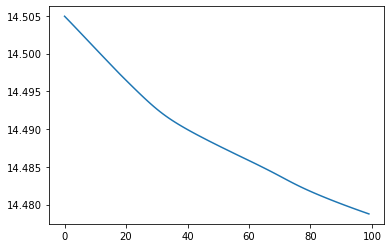

In [54]:
plt.plot(np.arange(len(model.loss_val)),model.loss_val)